<a href="https://colab.research.google.com/github/SulemanShahani/Statistical-Analysis-and-Hypothesis-Testing/blob/main/Probabilityd_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Many statistical tools and techniques used in data analysis are rooted in probability. Probability measures the likelihood of an event occurring, ranging from 0 (never occurs) to 1 (always occurs). When working with data, variables in the dataset can be seen as random variables—variables that vary due to chance.

Probability distributions describe how a random variable is spread out or distributed. They help us understand which values a random variable is more likely to take on and which values are less likely.

In statistics, there are several precisely defined probability distributions, each with its own shape, that are used to model different types of random events. In this lesson, we'll explore some common probability distributions and learn how to work with them in Python.

##The Uniform Distribution

A uniform distribution is like a game where every number from a certain range has the same chance of being picked. No number is more likely than another. If we draw a picture of a uniform distribution, it looks flat because all the numbers are equally likely.

In Python, we can use a library called scipy.stats to work with these distributions. Let's load the libraries, make some numbers with a uniform distribution, and draw a picture to see what it looks like!

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0
                                 scale=10)     # To 10

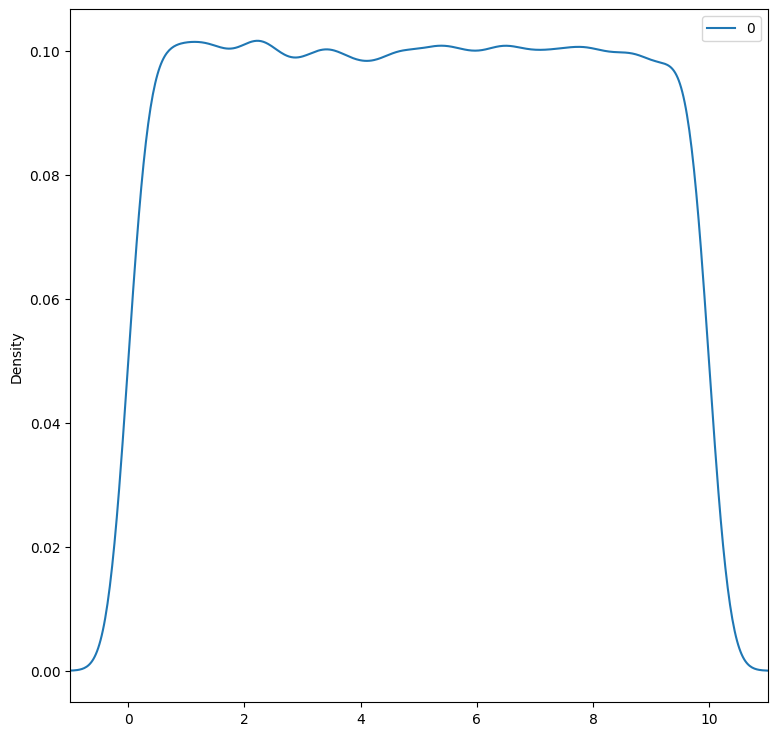

In [3]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

"Keep in mind that the plot above shows an estimate of the real pattern, since it's based on a collection of observations.

In the code above, we made 100,000 data points from a uniform spread that ranges from 0 to 10. In the density plot, we can see that the density of our even data is consistent, meaning that every number is equally likely to occur.

Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:

stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with. For the uniform distribution, you need to specify the starting and ending points and the size (number of random points to generate).

stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value. This is known as the cumulative distribution function. Essentially, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x-axis.

For example, in the uniform distribution above, there's a 25% chance that an observation will be in the range 0 to 2.5, and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [4]:
stats.uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

0.25

Another helpful function is stats.distribution.ppf(), which is the inverse of cdf(). It returns the x-axis cutoff value (quantile) associated with a given probability. For example, if we want to find the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [5]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

Another useful function is stats.distribution.pdf(), which gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density, and x values outside the range will have a probability density of 0:

In [6]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print( stats.uniform.pdf(x, loc=0, scale=10) )

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


The range(-1, 12, 3) function generates a sequence starting from -1, up to (but not including) 12, in steps of 3. So, the values of x will be -1, 2, 5, 8, and 11.
Explanation of Results:

For x = -1:

The value -1 is outside the range of the uniform distribution (0 to 10). Therefore, the probability density at x = -1 is 0.0.
For x = 2, 5, 8:

These values (2, 5, and 8) lie within the range of the uniform distribution (0 to 10). Since the uniform distribution is flat and all values within its range are equally likely, the probability density at each of these values is 0.1.
For x = 11:

The value 11 is outside the range of the uniform distribution (0 to 10). Therefore, the probability density at x = 11 is 0.0.


##The Normal Distribution

The normal or Gaussian distribution is like a special shape that some things in the world follow. It looks like a smooth, symmetrical (meaning both sides are the same) curve that's shaped like a bell. Imagine a bell that rings in the middle and then curves down on both sides.

Here's how it works:

The middle of the bell curve is where most of the things are. This is called the "mean" or the average. For example, if we're talking about the heights of kids in a classroom, the middle of the curve would be the average height.
The bell curve also tells us how spread out or close together things are. This is called the "standard deviation." If the standard deviation is small, it means most kids are close to the average height. If it's big, it means kids are spread out in height.
Here's a cool thing about the bell curve:

About 68% of the kids' heights are within one hump (or standard deviation) of the average. So, if the average height is 100 cm and the standard deviation is 10 cm, then about 68% of the kids are between 90 cm and 110 cm tall.
About 95% of the kids' heights are within two humps (or standard deviations) of the average. So, in our example, that would be between 80 cm and 120 cm.
Almost all, about 99.7%, of the kids' heights are within three humps (or standard deviations) of the average. So, in our example, that would be between 70 cm and 130 cm.
Why is the bell curve important?

Many things in real life, like the heights of kids or the scores on a test, follow this bell-shaped curve. That's why it's really useful for scientists and teachers to understand.
It helps us know what's normal and what's not. For example, if a kid is much taller or shorter than most other kids, we can see that on the bell curve.
In Python, we use a library called scipy.stats to work with the bell curve and do cool things with it, like find out how likely something is or draw pictures of the bell curve.



In [7]:
prob_under_minus1 = stats.norm.cdf(x= -1,
                                loc = 0,
                                scale= 1)

prob_over_1 = 1 - stats.norm.cdf(x= 1,
                                loc = 0,
                                scale= 1)

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


The results show that roughly 16% of the data from a normal distribution with an average (mean) of 0 and a spread (standard deviation) of 1 is below -1, another 16% is above 1, and 68% lies between -1 and 1. This matches the rule we talked about: about 68% of the data falls within one hump (standard deviation) of the mean, 95% within two humps, and almost all, 99.7%, within three humps.



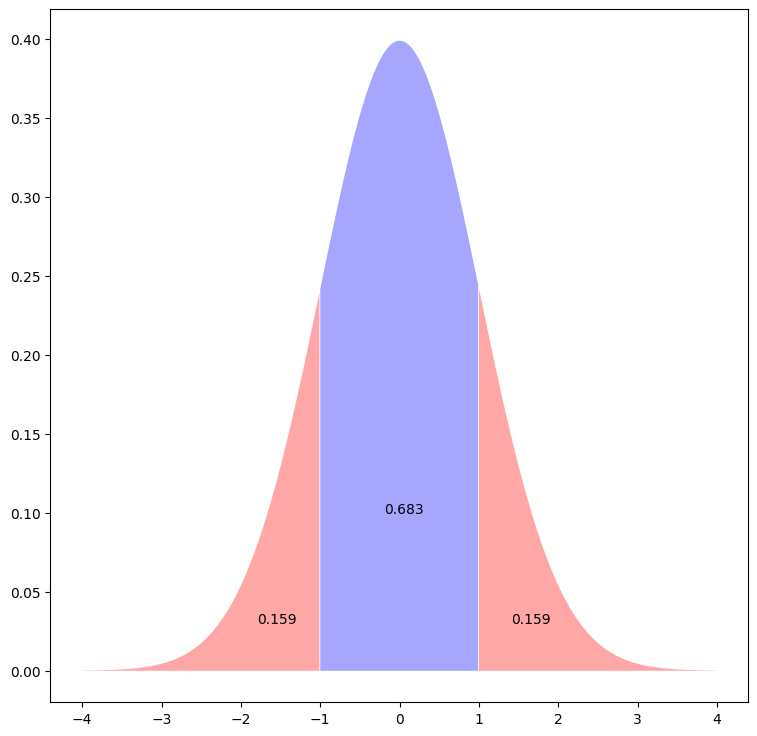

In [8]:

# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)

plt.fill_between(x=np.arange(-4,-1,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01),
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01),
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

The plot above shows the bell shape of the normal distribution. It illustrates the areas below and above one standard deviation, as well as the area within one standard deviation of the mean. This matches the rule we talked about earlier: about 68% of the data falls within one hump (standard deviation) of the mean.

Finding quantiles of the normal distribution is a common task in statistical tests. You can check normal distribution quantiles using stats.norm.ppf():



In [9]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that approximately 5% of the data lies more than 2 standard deviations from the mean.

Note: The mean of 0 and standard deviation of 1 are default values for the normal distribution in Python's scipy.stats library.

## The Binomial Distribution

The binomial distribution is a way to model the outcomes of a number of random trials of some experiment or event. It's a discrete probability distribution defined by two main things:

The probability of success in each trial.
The number of trials.
The binomial distribution helps us understand how likely it is to achieve a certain number of successes in a fixed number of trials. For example, imagine flipping a fair coin 10 times. We can use a binomial distribution where the number of coin flips is 10 and the probability of getting heads (success) is 0.5. This distribution would tell us the chances of getting exactly 0 heads, 1 head, 2 heads, and so on.

In Python's scipy.stats library, the nickname for the binomial distribution is binom. Let's generate some binomial data and take a look:



col_0   0   1    2     3     4     5     6     7    8    9   10
row_0                                                          
counts   4  85  429  1167  2076  2496  2051  1162  413  107  10


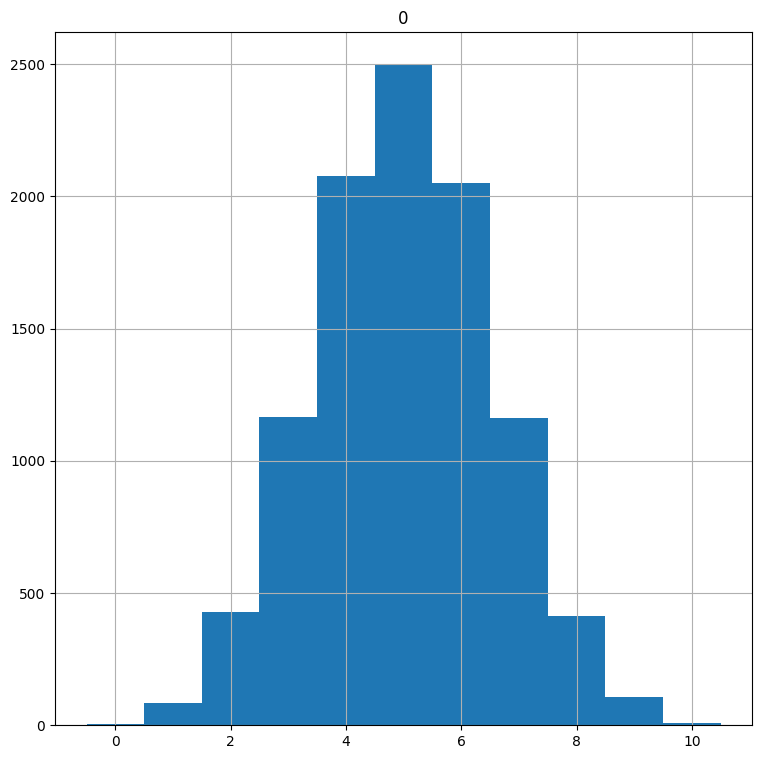

In [10]:
fair_coin_flips = stats.binom.rvs(n=10,        # Number of flips per trial
                                  p=0.5,       # Success probability
                                  size=10000)  # Number of trials

print( pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

Note that the binomial distribution is a discrete probability distribution, which means it only takes on integer values. We can summarize binomial data using a frequency table and visualize its distribution using a histogram.

The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric. The most likely outcomes are centered around the middle. This symmetry is reminiscent of the normal distribution.

However, if we change the probability of success, the distribution won't be symmetric:



col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   5  55  252  842  2011  3069  2693  1073


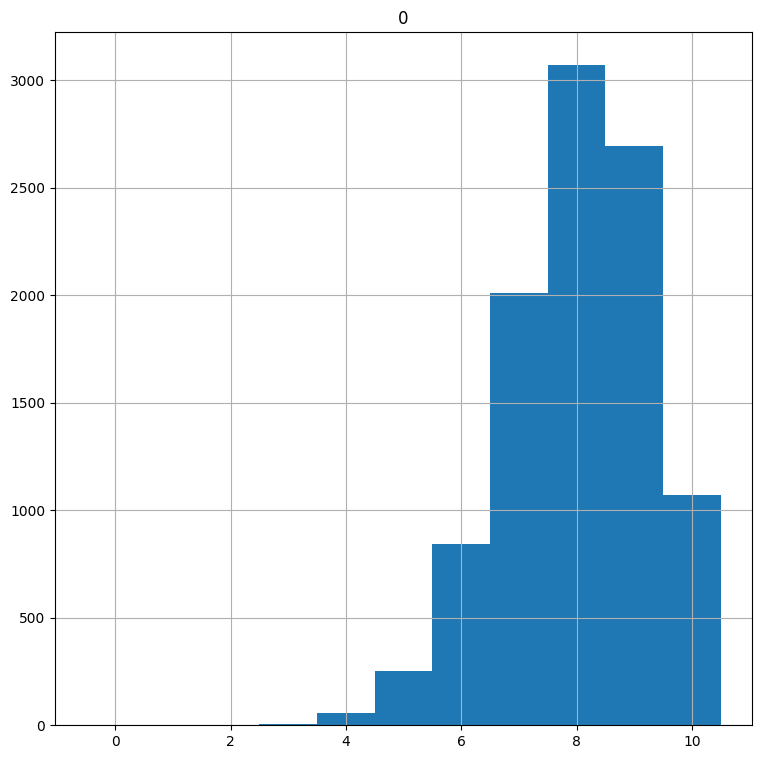

In [11]:
biased_coin_flips = stats.binom.rvs(n=10,      # Number of flips per trial
                                  p=0.8,       # Success probability
                                  size=10000)  # Number of trials

# Print table of counts
print( pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

The cdf() function helps us find out the chance of getting a certain number of successes within a specific range.

Imagine you are flipping a coin and want to know how likely it is to get a certain number of heads. The cdf() function tells you the chance of getting up to a certain number of heads.

For example, if you want to know how likely it is to get 3 heads or fewer when you flip the coin 10 times, you can use the cdf() function. It gives you the chance of getting 3 heads or fewer.

Here's an example:

In [12]:
stats.binom.cdf(k=5,        # Probability of k = 5 successes or less
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8

0.03279349759999997

In [17]:
# Number of trials (coin flips)
n = 10

# Probability of success (getting heads)
p = 0.8

# Using the cdf() function to find the chance of getting 3 heads or fewer
chance = stats.binom.cdf(5, n, p)

print("Chance of getting 3 heads or fewer:", chance)

Chance of getting 3 heads or fewer: 0.03279349759999997





Imagine we are flipping a coin 10 times. You want to know how likely it is to get 9 heads or more.

In this case, we use a special formula to find out. Here's how it works:

Flips: You flip the coin 10 times.
Heads: The chance of getting heads each time is 80% (0.8).
Goal: You want to know the chance of getting 9 heads or more.
Let's see how to find out:

In [13]:
1 - stats.binom.cdf(k=8,        # Probability of k = 9 successes or more
                    n=10,       # With 10 flips
                    p=0.8)      # And success probability 0.8

0.37580963840000015

In [18]:
flips = 10

# The chance you will get heads each time
heads = 0.8

# The chance of getting 9 or more heads
chance = 1 - stats.binom.cdf(k=8, n=flips, p=heads)

print("Chance of getting 9 or more heads:", chance)

Chance of getting 9 or more heads: 0.37580963840000015


For continuous things like the height of everyone in  class, you use a special thing called pdf() to see how likely someone is to be a certain height. For other things, like how many times you can flip a coin and get heads, you use a special thing called pmf() to see how likely you are to get a certain number of heads.

So, if you want to know how likely it is to get a certain number of heads, you would use pmf().

In [20]:
import scipy.stats as stats

# Number of times you flip the coin
flips = 10

# The chance you will get heads each time
heads = 0.5

# The chance of getting exactly 5 heads
chance = stats.binom.pmf(k=5, n=flips, p=heads)

print("Chance of getting exactly 5 heads:", chance)


Chance of getting exactly 5 heads: 0.24609375000000003



Sure, here's how you would explain it:

Imagine you're flipping a coin 10 times, and you want to know how likely it is to get exactly 8 heads. To find out, we use a special formula:

Flips: You flip the coin 10 times.
Heads: The chance of getting heads each time is 80% (or 0.8).
Goal: You want to know the chance of getting exactly 8 heads.

In [21]:
# Number of times you flip the coin
flips = 10

# The chance you will get heads each time
heads = 0.8

# The chance of getting exactly 8 heads
chance = stats.binom.pmf(k=8, n=flips, p=heads)

print("Chance of getting exactly 8 heads:", chance)


Chance of getting exactly 8 heads: 0.30198988799999993


##The Geometric and Exponential Distributions


Sure, here's an explanation:

The geometric and exponential distributions are used to model the time it takes for something to happen. Let's talk about the geometric distribution first. It's like when you keep trying something over and over until you finally succeed.

Imagine flipping a coin and wanting to get heads. If you flip the coin and it lands on tails, you flip it again, and again, until you finally get heads. The geometric distribution helps us figure out how many times you have to flip the coin before you get heads.



col_0     1     2     3    4    5    6   7   8   9   10  11  12  15
row_0                                                              
counts  5052  2485  1212  629  329  141  69  38  14  16  10   4   1


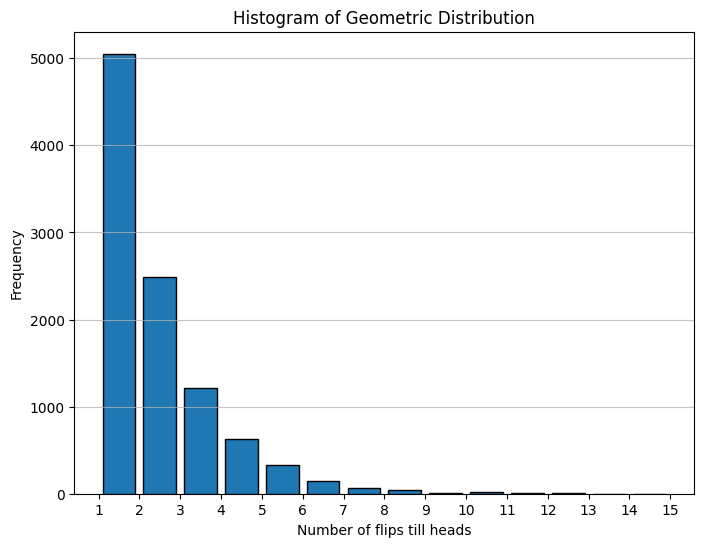

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(12)

# Generate geometric data (number of flips till heads)
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)

# Print table of counts
counts_table = pd.crosstab(index="counts", columns=flips_till_heads)
print(counts_table)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(flips_till_heads, bins=np.arange(min(flips_till_heads), max(flips_till_heads) + 1, 1), rwidth=0.8, edgecolor='black')
plt.xticks(np.arange(min(flips_till_heads), max(flips_till_heads) + 1, 1))
plt.xlabel('Number of flips till heads')
plt.ylabel('Frequency')
plt.title('Histogram of Geometric Distribution')
plt.grid(axis='y', alpha=0.75)
plt.show()

The histogram we made shows how many times it took to get a head when flipping a coin, and it looks like what we'd expect. It's very likely that you'll get a head in 1 or 2 flips, but it's very unlikely to take more than 5 flips to get a head. In the 10,000 tries we did, the most it took to get a head was 13 flips.

Now, let's use a special function called cdf() to check how likely it is to need 6 flips or more to get a head:



To find out the probability of needing 6 flips or more to get a head when flipping a coin, we can use the cumulative distribution function (CDF) in Python.



In [24]:
import scipy.stats as stats

# Probability of getting heads (success)
p = 0.5

# Calculate the cumulative probability of getting heads in the first 5 flips
first_five = stats.geom.cdf(k=5, p=p)

# Probability of needing 6 flips or more to get a success
probability = 1 - first_five

print("Probability of needing 6 flips or more to get a success:", probability)


Probability of needing 6 flips or more to get a success: 0.03125


To check the probability of seeing a specific number of flips before a success (heads in this case), we use the Probability Mass Function (PMF) provided by the geometric distribution in Python.

In [25]:
import scipy.stats as stats

# Probability of getting heads (success)
p = 0.5

# Number of flips we're interested in
k = 2

# Probability of needing exactly k flips to get the first success
probability = stats.geom.pmf(k, p)

print("Probability of needing exactly", k, "flips to get the first success:", probability)


Probability of needing exactly 2 flips to get the first success: 0.25


## Exponential Distribution

The exponential distribution is a continuous probability distribution that models the time it takes for an event to occur. It is often used to represent the amount of time you have to wait before a certain event happens, given a certain rate of occurrence.



##Relationship to Geometric Distribution:
Geometric Distribution: Models the number of trials needed to achieve the first success (e.g., getting heads on a coin flip) with a given probability of success.

Exponential Distribution: Models the time it takes for an event to occur, such as the time until the first success in a series of trials.



In [26]:
import scipy.stats as stats

# Calculate the cumulative probability of waiting less than or equal to 1 time unit for an event
prob_1 = stats.expon.cdf(x=1, scale=1)

# Calculate the probability of waiting more than 1 time unit for an event
prob_more_than_1 = 1 - prob_1

print("Probability of waiting more than 1 time unit before a success:", prob_more_than_1)


Probability of waiting more than 1 time unit before a success: 0.36787944117144233


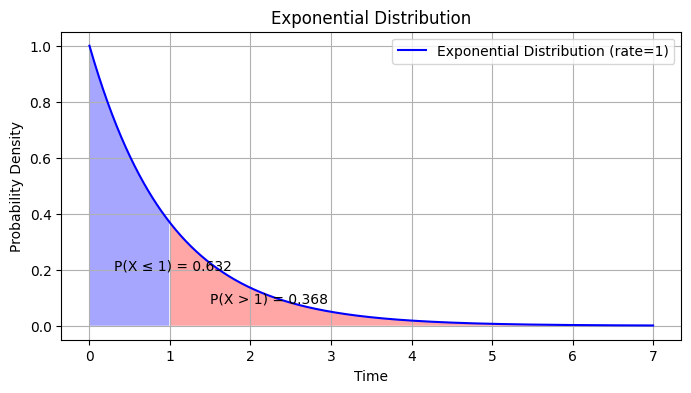

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the arrival rate
arrival_rate = 1  # For simplicity, set to 1

# Calculate the cumulative probability of waiting less than or equal to 1 time unit for an event
prob_1 = stats.expon.cdf(x=1, scale=1)

# Generate some data points for the exponential distribution
x = np.linspace(0, 7, 1000)
y = stats.expon.pdf(x, scale=1/arrival_rate)  # PDF of exponential distribution

# Plot the probability density function (PDF) of the exponential distribution
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label=f'Exponential Distribution (rate={arrival_rate})')
plt.fill_between(x=np.arange(0, 1, 0.01), y1=stats.expon.pdf(np.arange(0, 1, 0.01), scale=1/arrival_rate), facecolor='blue', alpha=0.35)
plt.fill_between(x=np.arange(1, 7, 0.01), y1=stats.expon.pdf(np.arange(1, 7, 0.01), scale=1/arrival_rate), facecolor='red', alpha=0.35)

# Annotate the probabilities
plt.text(x=0.3, y=0.2, s=f'P(X ≤ 1) = {round(prob_1, 3)}')
plt.text(x=1.5, y=0.08, s=f'P(X > 1) = {round(1 - prob_1, 3)}')

plt.title('Exponential Distribution')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


The exponential distribution helps us understand how long we might have to wait for something to happen. It's like waiting for a bus: most of the time, we won't wait long, but sometimes we might wait longer than usual. The distribution shows us these chances of waiting different amounts of time.

##The Poisson Distribution

The Poisson distribution helps us predict how many times something might happen in a certain amount of time. It's like guessing how many buses might come in an hour or how many messages you might get in a day.

col_0      0     1     2    3    4   5  6
row_0                                    
counts  3705  3666  1816  632  147  29  5


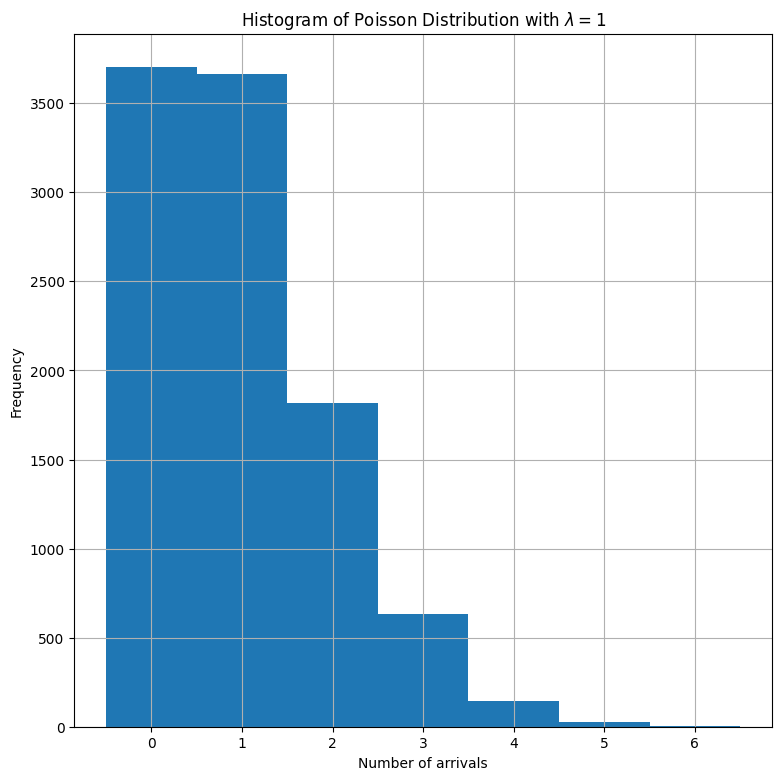

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(12)

# Generate Poisson data
arrival_rate_1 = stats.poisson.rvs(mu=1, size=10000)

# Print table of counts
print(pd.crosstab(index="counts", columns=arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5, max(arrival_rate_1) + 0.5), bins=max(arrival_rate_1) + 1)
plt.xlabel('Number of arrivals')
plt.ylabel('Frequency')
plt.title('Histogram of Poisson Distribution with $\lambda = 1$')
plt.show()


The histogram shows how often we expect different numbers of arrivals in a certain time. When there are only a few arrivals expected, it's rare to see more than a couple. But when there are a lot of arrivals expected, it's rare to see only a few.

col_0   0   1   2   3    4    5    6    7     8     9   ...   15   16   17  \
row_0                                                   ...                  
counts   1   2  17  56  157  445  607  979  1088  1228  ...  358  198  122   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  77  42  17   8   2   3   1  

[1 rows x 25 columns]


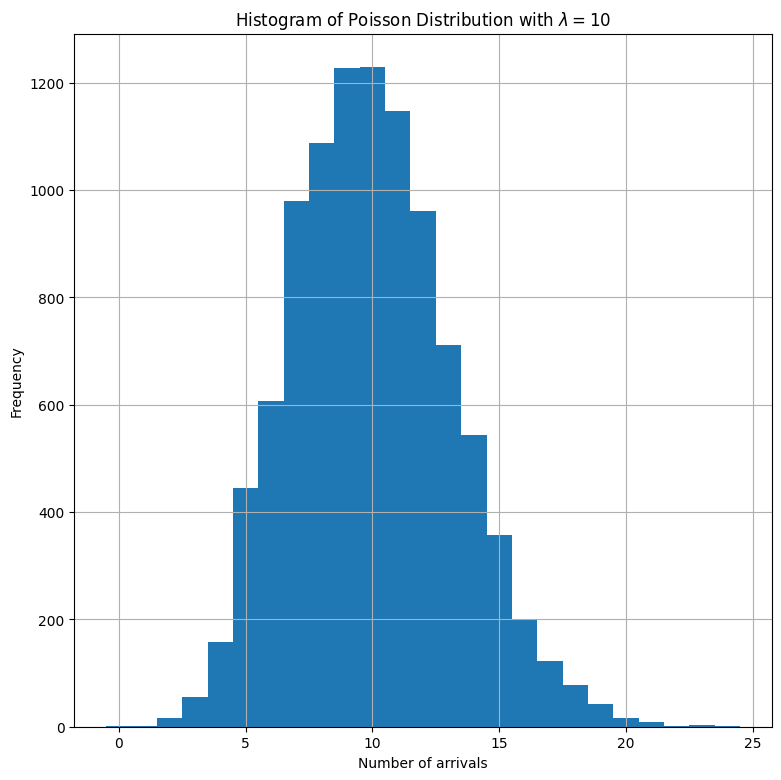

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(12)

# Generate Poisson data
arrival_rate_10 = stats.poisson.rvs(mu=10, size=10000)

# Print table of counts
print(pd.crosstab(index="counts", columns=arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5, max(arrival_rate_10) + 0.5), bins=max(arrival_rate_10) + 1)
plt.xlabel('Number of arrivals')
plt.ylabel('Frequency')
plt.title('Histogram of Poisson Distribution with $\lambda = 10$')
plt.show()


The Poisson distribution can sometimes look symmetric, especially when the arrival rate is high. However, it can also appear skewed, especially when the arrival rate is low. The histogram provides a visual representation of the distribution of arrival counts.

Similar to other discrete probability distributions, we can use the cumulative distribution function (cdf()) to determine the probability of achieving more or less than a certain number of successes, and the probability mass function (pmf()) to check the probability of obtaining a specific number of successes:

In [33]:
import scipy.stats as stats

# Check the probability of 5 arrivals or less with an arrival rate of 10
probability = stats.poisson.cdf(k=5, mu=10)

print(f"The probability of observing 5 arrivals or less with an arrival rate of 10 is: {probability:.4f}")


The probability of observing 5 arrivals or less with an arrival rate of 10 is: 0.0671


In [34]:
import scipy.stats as stats

# Check the probability of 10 arrivals or less with an arrival rate of 10
probability = stats.poisson.cdf(k=10, mu=10)

print(f"The probability of observing 10 arrivals or less with an arrival rate of 10 is: {probability:.4f}")


The probability of observing 10 arrivals or less with an arrival rate of 10 is: 0.5830
